## Import Modules

In [1]:
from fbprophet import Prophet
import pandas as pd

Importing plotly failed. Interactive plots will not work.


In [2]:
# model = Prophet(growth = 'logistic')

## Read Data

In [3]:
df = pd.read_csv('Combined_Data_for_model_final_2.csv')

In [4]:
df[df['Date'] == '2021-01-01 00:00:00']

,Unnamed: 0,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility
175391,175391,2021-01-01 00:00:00,4735.48,5.0,4.3,94.97,0.0,0.0,27.5,0.3


In [5]:
df_train = df.iloc[175391:]

In [6]:
df_train

,Unnamed: 0,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility
175391,175391,2021-01-01 00:00:00,4735.48,5.0,4.3,94.97,0.0,0.0,27.5,0.3
175392,175392,2021-01-01 00:15:00,4551.79,5.0,4.3,94.97,0.0,0.0,27.5,0.3
175393,175393,2021-01-01 00:30:00,4436.61,5.0,4.3,94.97,0.0,0.0,27.5,0.3
175394,175394,2021-01-01 00:45:00,4399.55,5.0,4.3,94.97,0.0,0.0,27.5,0.3
175395,175395,2021-01-01 01:00:00,4380.31,6.5,5.5,93.33,0.0,0.0,25.8,0.5
...,...,...,...,...,...,...,...,...,...,...
210426,210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0
210427,210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3
210428,210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3
210429,210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3


In [9]:
df_train['Date'] = pd.to_datetime(df_train['Date'])

C:\Users\HP\AppData\Local\Temp/ipykernel_544/99705317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Date'] = pd.to_datetime(df_train['Date'])


In [10]:
df_train

,Unnamed: 0,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility
175391,175391,2021-01-01 00:00:00,4735.48,5.0,4.3,94.97,0.0,0.0,27.5,0.3
175392,175392,2021-01-01 00:15:00,4551.79,5.0,4.3,94.97,0.0,0.0,27.5,0.3
175393,175393,2021-01-01 00:30:00,4436.61,5.0,4.3,94.97,0.0,0.0,27.5,0.3
175394,175394,2021-01-01 00:45:00,4399.55,5.0,4.3,94.97,0.0,0.0,27.5,0.3
175395,175395,2021-01-01 01:00:00,4380.31,6.5,5.5,93.33,0.0,0.0,25.8,0.5
...,...,...,...,...,...,...,...,...,...,...
210426,210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0
210427,210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3
210428,210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3
210429,210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3


## Multivariate Forecasting

In [11]:
dfmv = df_train[['Date', 'Haryana Load (MW)', 'temp', 'dew', 'humidity', 'cloudcover', 'windspeed', 'winddir', 'visibility']]

In [12]:
dfmv

,Date,Haryana Load (MW),temp,dew,humidity,cloudcover,windspeed,winddir,visibility
175391,2021-01-01 00:00:00,4735.48,5.0,4.3,94.97,27.5,0.0,0.0,0.3
175392,2021-01-01 00:15:00,4551.79,5.0,4.3,94.97,27.5,0.0,0.0,0.3
175393,2021-01-01 00:30:00,4436.61,5.0,4.3,94.97,27.5,0.0,0.0,0.3
175394,2021-01-01 00:45:00,4399.55,5.0,4.3,94.97,27.5,0.0,0.0,0.3
175395,2021-01-01 01:00:00,4380.31,6.5,5.5,93.33,25.8,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...
210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0
210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3


In [13]:
dfmv.head()

,Date,Haryana Load (MW),temp,dew,humidity,cloudcover,windspeed,winddir,visibility
175391,2021-01-01 00:00:00,4735.48,5.0,4.3,94.97,27.5,0.0,0.0,0.3
175392,2021-01-01 00:15:00,4551.79,5.0,4.3,94.97,27.5,0.0,0.0,0.3
175393,2021-01-01 00:30:00,4436.61,5.0,4.3,94.97,27.5,0.0,0.0,0.3
175394,2021-01-01 00:45:00,4399.55,5.0,4.3,94.97,27.5,0.0,0.0,0.3
175395,2021-01-01 01:00:00,4380.31,6.5,5.5,93.33,25.8,0.0,0.0,0.5


In [14]:
dfmv.tail()

,Date,Haryana Load (MW),temp,dew,humidity,cloudcover,windspeed,winddir,visibility
210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0
210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210430,2021-12-31 23:45:00,4449.94,9.2,7.3,88.04,28.5,0.0,0.0,1.3


In [15]:
dfmv = dfmv.rename(columns = {'Date':'ds', 'Haryana Load (MW)':'y'})

In [16]:
import holidays

In [17]:
# HR_holidays = holidays.country_holidays('IN', subdiv='HR')

In [18]:
# HR_holidays[2016]

In [19]:
mv_model = Prophet(growth='logistic')

In [20]:
mv_model.add_regressor('temp')
mv_model.add_regressor('dew')
mv_model.add_regressor('humidity')

mv_model.add_regressor('cloudcover')

mv_model.add_regressor('windspeed')
mv_model.add_regressor('winddir')
mv_model.add_regressor('visibility')

## We want model trained with 2021 data and tested on 2022 future data, and 2022 initial data

In [21]:
df_train['cap'] = 6000

C:\Users\HP\AppData\Local\Temp/ipykernel_544/1207476209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['cap'] = 6000


In [22]:
df_train

,Unnamed: 0,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility,cap
175391,175391,2021-01-01 00:00:00,4735.48,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
175392,175392,2021-01-01 00:15:00,4551.79,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
175393,175393,2021-01-01 00:30:00,4436.61,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
175394,175394,2021-01-01 00:45:00,4399.55,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
175395,175395,2021-01-01 01:00:00,4380.31,6.5,5.5,93.33,0.0,0.0,25.8,0.5,6000
...,...,...,...,...,...,...,...,...,...,...,...
210426,210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0,6000
210427,210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3,6000
210428,210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,6000
210429,210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,6000


In [24]:
df_train.drop(columns='Unnamed: 0', inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
df_train.reset_index(inplace=True)

In [29]:
df_train.drop(columns='index', inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
df_train

,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility,cap
0,2021-01-01 00:00:00,4735.48,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
1,2021-01-01 00:15:00,4551.79,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
2,2021-01-01 00:30:00,4436.61,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
3,2021-01-01 00:45:00,4399.55,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
4,2021-01-01 01:00:00,4380.31,6.5,5.5,93.33,0.0,0.0,25.8,0.5,6000
...,...,...,...,...,...,...,...,...,...,...
35035,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0,6000
35036,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3,6000
35037,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,6000
35038,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,6000


In [51]:
df_train.rename(columns={'Date': 'ds', 'Haryana Load (MW)': 'y'}, inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [52]:
df_train

,ds,y,temp,dew,humidity,windspeed,winddir,cloudcover,visibility,cap
0,2021-01-01 00:00:00,4735.48,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
1,2021-01-01 00:15:00,4551.79,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
2,2021-01-01 00:30:00,4436.61,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
3,2021-01-01 00:45:00,4399.55,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
4,2021-01-01 01:00:00,4380.31,6.5,5.5,93.33,0.0,0.0,25.8,0.5,6000
...,...,...,...,...,...,...,...,...,...,...
35035,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0,6000
35036,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3,6000
35037,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,6000
35038,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,6000


In [32]:
df_test_future = pd.read_csv('processed_future_data.csv')

In [44]:
def preprocess_new_data(rawfilename, start_date, end_date):
    df = pd.read_csv(rawfilename)
    df['Date'] = pd.to_datetime(df['datetime'])
    df = df[['Date', 'temp', 'dew', 'humidity', 'windspeed', 'winddir', 'cloudcover', 'visibility']]
    df1 = pd.DataFrame(pd.date_range(start=start_date, end=end_date, freq='15min'))
    df1.rename(columns={0:'Date'}, inplace=True)
    df2 = df1.merge(df, how='left', left_on='Date', right_on='Date')
    df2.ffill(inplace=True)
    return df2

In [45]:
df_test_2022_1 = preprocess_new_data('Haryana_2020_Weather_Data/haryana 2022-01-01 to 2022-02-09.csv', '2022-01-01', '2022-02-09')

In [46]:
df_test_2022_1

,Date,temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,2022-01-01 00:00:00,10.0,8.0,87.38,0.0,0.0,27.4,2.0
1,2022-01-01 00:15:00,10.0,8.0,87.38,0.0,0.0,27.4,2.0
2,2022-01-01 00:30:00,10.0,8.0,87.38,0.0,0.0,27.4,2.0
3,2022-01-01 00:45:00,10.0,8.0,87.38,0.0,0.0,27.4,2.0
4,2022-01-01 01:00:00,9.0,8.0,93.45,0.0,0.0,27.4,1.0
...,...,...,...,...,...,...,...,...
3740,2022-02-08 23:00:00,16.6,15.2,91.56,0.0,0.0,74.4,1.9
3741,2022-02-08 23:15:00,16.6,15.2,91.56,0.0,0.0,74.4,1.9
3742,2022-02-08 23:30:00,16.6,15.2,91.56,0.0,0.0,74.4,1.9
3743,2022-02-08 23:45:00,16.6,15.2,91.56,0.0,0.0,74.4,1.9


## Fit model on Train Dataset

In [53]:
df_train

,ds,y,temp,dew,humidity,windspeed,winddir,cloudcover,visibility,cap
0,2021-01-01 00:00:00,4735.48,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
1,2021-01-01 00:15:00,4551.79,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
2,2021-01-01 00:30:00,4436.61,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
3,2021-01-01 00:45:00,4399.55,5.0,4.3,94.97,0.0,0.0,27.5,0.3,6000
4,2021-01-01 01:00:00,4380.31,6.5,5.5,93.33,0.0,0.0,25.8,0.5,6000
...,...,...,...,...,...,...,...,...,...,...
35035,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0,6000
35036,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3,6000
35037,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,6000
35038,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3,6000


In [54]:
mv_model.fit(df_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


## Save model

In [55]:
from prophet.serialize import model_to_json, model_from_json

with open('2021_mv_model.json', 'w') as fout:
    fout.write(model_to_json(mv_model))  # Save model

with open('2021_mv_model.json', 'r') as fin:
    saved_mv_model = model_from_json(fin.read())  # Load model

ERROR:prophet.plot:Importing plotly failed. Interactive plots will not work.


In [56]:
# import pickle

In [57]:
# import joblib

In [58]:
# joblib.dump(mv_model, 'logistic_mv_all_model_good.pkl')

In [50]:
# saved_mv_model = joblib.load('logistic_mv_all_model_good.pkl')

In [60]:
df_test_future

,Unnamed: 0,Date,temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,0,2022-06-13 00:00:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
1,1,2022-06-13 00:15:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
2,2,2022-06-13 00:30:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
3,3,2022-06-13 00:45:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
4,4,2022-06-13 01:00:00,35.0,15.0,30.28,9.4,230.0,50.0,3.0
...,...,...,...,...,...,...,...,...,...
1340,1340,2022-06-26 23:00:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1341,1341,2022-06-26 23:15:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1342,1342,2022-06-26 23:30:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1343,1343,2022-06-26 23:45:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1


In [61]:
df_test_future['cap'] = 6000

In [76]:
# test_ds = df_test.drop(columns='y') #Use this when test data has a load column
test_ds = df_test_future #Use this when test data has no load colum

In [78]:
test_ds.rename(columns={'Date': 'ds'}, inplace=True)

In [79]:
test_ds.drop(columns='Unnamed: 0', inplace=True)

## Make forecast on future test dataset

In [80]:
forecast = saved_mv_model.predict(test_ds)

In [81]:
test_forecast = forecast

In [82]:
test_forecast.head()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,winddir,winddir_lower,winddir_upper,windspeed,windspeed_lower,windspeed_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-06-13 00:00:00,5997.226016,6000,4611.319410,7791.957839,5997.225745,5997.226271,181.736814,181.736814,181.736814,...,84.903305,84.903305,84.903305,-1.07207,-1.07207,-1.07207,0.0,0.0,0.0,6178.962830
1,2022-06-13 00:15:00,5997.225854,6000,4450.192541,7725.567484,5997.225583,5997.226108,165.450968,165.450968,165.450968,...,84.903305,84.903305,84.903305,-1.07207,-1.07207,-1.07207,0.0,0.0,0.0,6162.676822
2,2022-06-13 00:30:00,5997.225692,6000,4372.071340,7697.641973,5997.225421,5997.225946,147.504793,147.504793,147.504793,...,84.903305,84.903305,84.903305,-1.07207,-1.07207,-1.07207,0.0,0.0,0.0,6144.730484
3,2022-06-13 00:45:00,5997.225530,6000,4355.743550,7810.865385,5997.225258,5997.225784,128.060369,128.060369,128.060369,...,84.903305,84.903305,84.903305,-1.07207,-1.07207,-1.07207,0.0,0.0,0.0,6125.285899
4,2022-06-13 01:00:00,5997.225367,6000,4617.131621,7758.902671,5997.225096,5997.225622,204.379016,204.379016,204.379016,...,84.903305,84.903305,84.903305,-1.07207,-1.07207,-1.07207,0.0,0.0,0.0,6201.604384


In [83]:
test_forecast.tail()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,winddir,winddir_lower,winddir_upper,windspeed,windspeed_lower,windspeed_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1340,2022-06-26 23:00:00,5996.999962,6000,5642.422353,9028.293888,5996.999633,5997.000279,1391.599103,1391.599103,1391.599103,...,-38.160528,-38.160528,-38.160528,-8.720557,-8.720557,-8.720557,0.0,0.0,0.0,7388.599065
1341,2022-06-26 23:15:00,5996.999787,6000,5706.222845,9054.889985,5996.999458,5997.000104,1381.558757,1381.558757,1381.558757,...,-38.160528,-38.160528,-38.160528,-8.720557,-8.720557,-8.720557,0.0,0.0,0.0,7378.558544
1342,2022-06-26 23:30:00,5996.999611,6000,5617.161408,9054.596051,5996.999282,5996.999928,1370.128324,1370.128324,1370.128324,...,-38.160528,-38.160528,-38.160528,-8.720557,-8.720557,-8.720557,0.0,0.0,0.0,7367.127936
1343,2022-06-26 23:45:00,5996.999436,6000,5691.363412,9035.902609,5996.999107,5996.999753,1357.176201,1357.176201,1357.176201,...,-38.160528,-38.160528,-38.160528,-8.720557,-8.720557,-8.720557,0.0,0.0,0.0,7354.175637
1344,2022-06-27 00:00:00,5996.999261,6000,5849.372338,9168.171347,5996.998931,5996.999578,1482.632455,1482.632455,1482.632455,...,-51.024740,-51.024740,-51.024740,-11.588739,-11.588739,-11.588739,0.0,0.0,0.0,7479.631716


In [84]:
test_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2022-06-13 00:00:00,6178.962830,4611.319410,7791.957839
1,2022-06-13 00:15:00,6162.676822,4450.192541,7725.567484
2,2022-06-13 00:30:00,6144.730484,4372.071340,7697.641973
3,2022-06-13 00:45:00,6125.285899,4355.743550,7810.865385
4,2022-06-13 01:00:00,6201.604384,4617.131621,7758.902671
...,...,...,...,...
1340,2022-06-26 23:00:00,7388.599065,5642.422353,9028.293888
1341,2022-06-26 23:15:00,7378.558544,5706.222845,9054.889985
1342,2022-06-26 23:30:00,7367.127936,5617.161408,9054.596051
1343,2022-06-26 23:45:00,7354.175637,5691.363412,9035.902609


In [87]:
test_forecast.to_csv('Predictions_on_future_data_by_2021_model.csv')

## Start from here now. Be careful of what is done, and continue

## Plot Actual Test Values

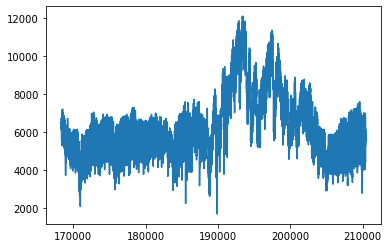

In [40]:
plt.plot(df_test['y'])
# plt.ylim([0, 12000])

## Plotting test forecast with actual test values

In [41]:
df_test

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir,visibility,cap
168354,2020-10-19 16:45:00,6699.14,32.0,10.0,25.82,0.0,14.8,300.0,4.0,6000
168355,2020-10-19 17:00:00,6749.01,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
168356,2020-10-19 17:15:00,6409.50,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
168357,2020-10-19 17:30:00,6576.38,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
168358,2020-10-19 17:45:00,6282.79,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
...,...,...,...,...,...,...,...,...,...,...
210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0,6000
210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000
210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000
210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000


In [42]:
test_forecast.reset_index(inplace=True)

In [43]:
df_test.reset_index(inplace=True)

In [44]:
df_test

,index,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir,visibility,cap
0,168354,2020-10-19 16:45:00,6699.14,32.0,10.0,25.82,0.0,14.8,300.0,4.0,6000
1,168355,2020-10-19 17:00:00,6749.01,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
2,168356,2020-10-19 17:15:00,6409.50,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
3,168357,2020-10-19 17:30:00,6576.38,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
4,168358,2020-10-19 17:45:00,6282.79,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
...,...,...,...,...,...,...,...,...,...,...,...
42072,210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0,6000
42073,210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000
42074,210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000
42075,210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000


In [45]:
test_forecast

,index,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0,2020-10-19 16:45:00,5999.771291,6000,4734.011634,6949.022390,5999.771291,5999.771291,-158.547658,-158.547658,...,-57.405638,-57.405638,-57.405638,-459.593351,-459.593351,-459.593351,0.0,0.0,0.0,5841.223633
1,1,2020-10-19 17:00:00,5999.771307,6000,5020.668168,7099.012594,5999.771307,5999.771307,52.103511,52.103511,...,6.099678,6.099678,6.099678,-460.107132,-460.107132,-460.107132,0.0,0.0,0.0,6051.874818
2,2,2020-10-19 17:15:00,5999.771323,6000,4975.059431,7198.693497,5999.771323,5999.771323,124.800046,124.800046,...,6.099678,6.099678,6.099678,-460.621321,-460.621321,-460.621321,0.0,0.0,0.0,6124.571370
3,3,2020-10-19 17:30:00,5999.771339,6000,5144.867946,7306.592662,5999.771339,5999.771339,207.924824,207.924824,...,6.099678,6.099678,6.099678,-461.135918,-461.135918,-461.135918,0.0,0.0,0.0,6207.696163
4,4,2020-10-19 17:45:00,5999.771355,6000,5218.392166,7363.663466,5999.771355,5999.771355,299.201044,299.201044,...,6.099678,6.099678,6.099678,-461.650923,-461.650923,-461.650923,0.0,0.0,0.0,6298.972399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42072,42072,2021-12-31 22:45:00,5999.988095,6000,4184.379449,6277.150099,5999.987491,5999.988702,-721.907446,-721.907446,...,69.604994,69.604994,69.604994,341.414146,341.414146,341.414146,0.0,0.0,0.0,5278.080649
42073,42073,2021-12-31 23:00:00,5999.988096,6000,4261.510808,6408.912564,5999.987491,5999.988703,-710.298518,-710.298518,...,69.604994,69.604994,69.604994,341.331212,341.331212,341.331212,0.0,0.0,0.0,5289.689578
42074,42074,2021-12-31 23:15:00,5999.988096,6000,4195.656944,6378.342567,5999.987492,5999.988703,-741.040682,-741.040682,...,69.604994,69.604994,69.604994,341.247533,341.247533,341.247533,0.0,0.0,0.0,5258.947415
42075,42075,2021-12-31 23:30:00,5999.988097,6000,4051.307148,6384.760311,5999.987493,5999.988704,-768.254245,-768.254245,...,69.604994,69.604994,69.604994,341.163108,341.163108,341.163108,0.0,0.0,0.0,5231.733852


In [46]:
df_test.drop(columns='index')

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir,visibility,cap
0,2020-10-19 16:45:00,6699.14,32.0,10.0,25.82,0.0,14.8,300.0,4.0,6000
1,2020-10-19 17:00:00,6749.01,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
2,2020-10-19 17:15:00,6409.50,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
3,2020-10-19 17:30:00,6576.38,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
4,2020-10-19 17:45:00,6282.79,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
...,...,...,...,...,...,...,...,...,...,...
42072,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0,6000
42073,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000
42074,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000
42075,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000


In [47]:
test_forecast

,index,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0,2020-10-19 16:45:00,5999.771291,6000,4734.011634,6949.022390,5999.771291,5999.771291,-158.547658,-158.547658,...,-57.405638,-57.405638,-57.405638,-459.593351,-459.593351,-459.593351,0.0,0.0,0.0,5841.223633
1,1,2020-10-19 17:00:00,5999.771307,6000,5020.668168,7099.012594,5999.771307,5999.771307,52.103511,52.103511,...,6.099678,6.099678,6.099678,-460.107132,-460.107132,-460.107132,0.0,0.0,0.0,6051.874818
2,2,2020-10-19 17:15:00,5999.771323,6000,4975.059431,7198.693497,5999.771323,5999.771323,124.800046,124.800046,...,6.099678,6.099678,6.099678,-460.621321,-460.621321,-460.621321,0.0,0.0,0.0,6124.571370
3,3,2020-10-19 17:30:00,5999.771339,6000,5144.867946,7306.592662,5999.771339,5999.771339,207.924824,207.924824,...,6.099678,6.099678,6.099678,-461.135918,-461.135918,-461.135918,0.0,0.0,0.0,6207.696163
4,4,2020-10-19 17:45:00,5999.771355,6000,5218.392166,7363.663466,5999.771355,5999.771355,299.201044,299.201044,...,6.099678,6.099678,6.099678,-461.650923,-461.650923,-461.650923,0.0,0.0,0.0,6298.972399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42072,42072,2021-12-31 22:45:00,5999.988095,6000,4184.379449,6277.150099,5999.987491,5999.988702,-721.907446,-721.907446,...,69.604994,69.604994,69.604994,341.414146,341.414146,341.414146,0.0,0.0,0.0,5278.080649
42073,42073,2021-12-31 23:00:00,5999.988096,6000,4261.510808,6408.912564,5999.987491,5999.988703,-710.298518,-710.298518,...,69.604994,69.604994,69.604994,341.331212,341.331212,341.331212,0.0,0.0,0.0,5289.689578
42074,42074,2021-12-31 23:15:00,5999.988096,6000,4195.656944,6378.342567,5999.987492,5999.988703,-741.040682,-741.040682,...,69.604994,69.604994,69.604994,341.247533,341.247533,341.247533,0.0,0.0,0.0,5258.947415
42075,42075,2021-12-31 23:30:00,5999.988097,6000,4051.307148,6384.760311,5999.987493,5999.988704,-768.254245,-768.254245,...,69.604994,69.604994,69.604994,341.163108,341.163108,341.163108,0.0,0.0,0.0,5231.733852


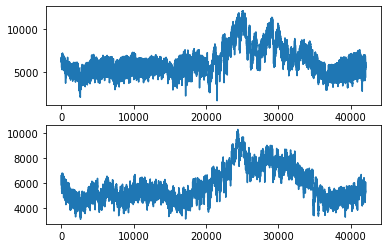

In [48]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(df_test['y'])
ax[1].plot(test_forecast['yhat'])

<function matplotlib.pyplot.show(close=None, block=None)>

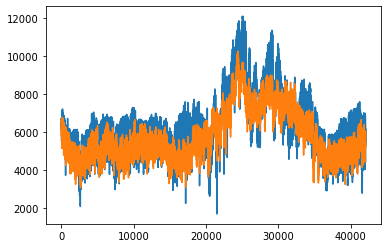

In [49]:
plt.plot(df_test['y'])
plt.plot(test_forecast['yhat'])
plt.show

## Other plots and to send

In [82]:
new_df = pd.DataFrame(df_test['ds'])

In [83]:
new_df['Actual'] = df_test['y']

In [84]:
new_df['Predicted'] = test_forecast['yhat']

In [85]:
new_df['yhat_upper'], new_df['yhat_lower'] = test_forecast['yhat_upper'], test_forecast['yhat_lower']

In [86]:
# new_df.rename(columns = {'ds': 'Date'}, inplace=True)

In [87]:
new_df

,ds,Actual,Predicted,yhat_upper,yhat_lower
0,2020-10-19 16:45:00,6699.14,5841.223633,6949.022390,4734.011634
1,2020-10-19 17:00:00,6749.01,6051.874818,7099.012594,5020.668168
2,2020-10-19 17:15:00,6409.50,6124.571370,7198.693497,4975.059431
3,2020-10-19 17:30:00,6576.38,6207.696163,7306.592662,5144.867946
4,2020-10-19 17:45:00,6282.79,6298.972399,7363.663466,5218.392166
...,...,...,...,...,...
42072,2021-12-31 22:45:00,4712.55,5278.080649,6277.150099,4184.379449
42073,2021-12-31 23:00:00,4649.58,5289.689578,6408.912564,4261.510808
42074,2021-12-31 23:15:00,4571.39,5258.947415,6378.342567,4195.656944
42075,2021-12-31 23:30:00,4510.39,5231.733852,6384.760311,4051.307148


In [95]:
new_df['Date'] = [new_df['ds'][i].date() for i in range(len(new_df['ds']))]

In [131]:
new_df

,ds,Actual,Predicted,yhat_upper,yhat_lower,Date
0,2020-10-19 16:45:00,6699.14,5841.223633,6949.022390,4734.011634,2020-10-19
1,2020-10-19 17:00:00,6749.01,6051.874818,7099.012594,5020.668168,2020-10-19
2,2020-10-19 17:15:00,6409.50,6124.571370,7198.693497,4975.059431,2020-10-19
3,2020-10-19 17:30:00,6576.38,6207.696163,7306.592662,5144.867946,2020-10-19
4,2020-10-19 17:45:00,6282.79,6298.972399,7363.663466,5218.392166,2020-10-19
...,...,...,...,...,...,...
42072,2021-12-31 22:45:00,4712.55,5278.080649,6277.150099,4184.379449,2021-12-31
42073,2021-12-31 23:00:00,4649.58,5289.689578,6408.912564,4261.510808,2021-12-31
42074,2021-12-31 23:15:00,4571.39,5258.947415,6378.342567,4195.656944,2021-12-31
42075,2021-12-31 23:30:00,4510.39,5231.733852,6384.760311,4051.307148,2021-12-31


In [138]:
new_df_20_10_2020 = new_df[new_df['Date'] == pd.to_datetime('2020-10-20')]

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [139]:
new_df_20_10_2020

,ds,Actual,Predicted,yhat_upper,yhat_lower,Date
29,2020-10-20 00:00:00,6251.87,5861.310087,6928.549406,4715.000218,2020-10-20
30,2020-10-20 00:15:00,6109.09,5847.126279,6878.697056,4719.854924,2020-10-20
31,2020-10-20 00:30:00,6064.18,5836.809909,6980.047017,4778.274109,2020-10-20
32,2020-10-20 00:45:00,6022.46,5830.095062,6892.381112,4711.657736,2020-10-20
33,2020-10-20 01:00:00,5979.60,5744.782339,6866.100992,4712.742691,2020-10-20
...,...,...,...,...,...,...
120,2020-10-20 22:45:00,6578.41,6176.057881,7185.284360,5168.676433,2020-10-20
121,2020-10-20 23:00:00,6555.89,5749.932130,6796.619665,4644.238744,2020-10-20
122,2020-10-20 23:15:00,6482.85,5716.078459,6779.269704,4529.081039,2020-10-20
123,2020-10-20 23:30:00,6418.88,5685.835017,6760.364702,4591.884570,2020-10-20


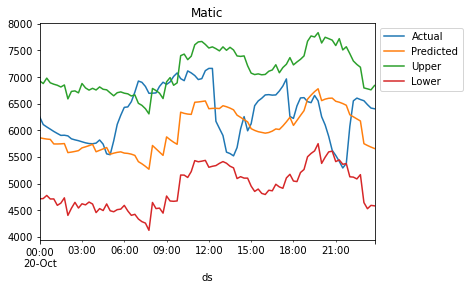

In [141]:
plt1 = new_df_20_10_2020.plot(x='ds', y=['Actual', 'Predicted', 'yhat_upper', 'yhat_lower'], title='Matic')
# plt1.legend(["Actual"], bbox_to_anchor=(1.0,1.0))
# plt1 = new_df.plot(x="Date", y= ["Predicted", 'yhat_upper', 'yhat_lower'], ax=plt1, title= "Matic")
plt1.legend(['Actual', "Predicted", "Upper", "Lower"], bbox_to_anchor=(1.0,1.0))
plt.show()

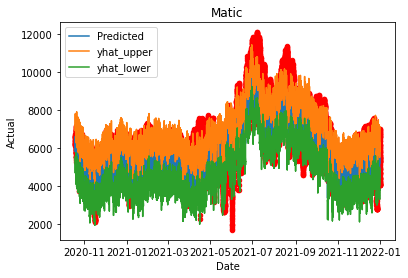

In [185]:
plt1 = new_df.plot.scatter(x='Date', y='Actual', color='red', legend = ['Actual'])
plt1 = new_df.plot(x="Date", y= ["Predicted", 'yhat_upper', 'yhat_lower'], ax=plt1, title= "Matic", legend=(["Predicted", 'Upper', 'Lower']))
# plt1.legend(["Actual","Predicted", "Upper", "Lower"], bbox_to_anchor=(1.0,1.0))
plt.show()

In [186]:
df_to_send = new_df

In [189]:
df_to_send.drop(columns=['Date'], inplace=True)

In [190]:
df_to_send.rename(columns={'ds':'Date'}, inplace=True)

In [191]:
df_to_send

,Date,Actual,Predicted,yhat_upper,yhat_lower
0,2020-10-19 16:45:00,6699.14,5841.223633,6949.022390,4734.011634
1,2020-10-19 17:00:00,6749.01,6051.874818,7099.012594,5020.668168
2,2020-10-19 17:15:00,6409.50,6124.571370,7198.693497,4975.059431
3,2020-10-19 17:30:00,6576.38,6207.696163,7306.592662,5144.867946
4,2020-10-19 17:45:00,6282.79,6298.972399,7363.663466,5218.392166
...,...,...,...,...,...
42072,2021-12-31 22:45:00,4712.55,5278.080649,6277.150099,4184.379449
42073,2021-12-31 23:00:00,4649.58,5289.689578,6408.912564,4261.510808
42074,2021-12-31 23:15:00,4571.39,5258.947415,6378.342567,4195.656944
42075,2021-12-31 23:30:00,4510.39,5231.733852,6384.760311,4051.307148


In [193]:
df_to_send.to_csv('test_set_actual_predictions_2018_onwards_data.csv')

In [194]:
df_to_send

,Date,Actual,Predicted,yhat_upper,yhat_lower
0,2020-10-19 16:45:00,6699.14,5841.223633,6949.022390,4734.011634
1,2020-10-19 17:00:00,6749.01,6051.874818,7099.012594,5020.668168
2,2020-10-19 17:15:00,6409.50,6124.571370,7198.693497,4975.059431
3,2020-10-19 17:30:00,6576.38,6207.696163,7306.592662,5144.867946
4,2020-10-19 17:45:00,6282.79,6298.972399,7363.663466,5218.392166
...,...,...,...,...,...
42072,2021-12-31 22:45:00,4712.55,5278.080649,6277.150099,4184.379449
42073,2021-12-31 23:00:00,4649.58,5289.689578,6408.912564,4261.510808
42074,2021-12-31 23:15:00,4571.39,5258.947415,6378.342567,4195.656944
42075,2021-12-31 23:30:00,4510.39,5231.733852,6384.760311,4051.307148


In [195]:
df_to_send[df_to_send['Date'] == '2020-10-20 00:00:00']

,Date,Actual,Predicted,yhat_upper,yhat_lower
29,2020-10-20,6251.87,5861.310087,6928.549406,4715.000218


In [196]:
first_month_test = df_to_send[29:29+96*31]

In [198]:
first_month_test.reset_index(inplace=True)

In [199]:
last_month_test = df_to_send[-96*31:]
last_month_test.reset_index(inplace=True)
last_month_test

,index,Date,Actual,Predicted,yhat_upper,yhat_lower
0,39101,2021-12-01 00:00:00,4297.50,4495.519253,5570.032762,3339.603747
1,39102,2021-12-01 00:15:00,4213.90,4478.554893,5625.928611,3365.275609
2,39103,2021-12-01 00:30:00,4153.19,4465.579461,5568.878665,3353.975877
3,39104,2021-12-01 00:45:00,4178.42,4456.327851,5492.518084,3357.160009
4,39105,2021-12-01 01:00:00,4150.80,4566.441905,5710.708672,3514.336068
...,...,...,...,...,...,...
2971,42072,2021-12-31 22:45:00,4712.55,5278.080649,6277.150099,4184.379449
2972,42073,2021-12-31 23:00:00,4649.58,5289.689578,6408.912564,4261.510808
2973,42074,2021-12-31 23:15:00,4571.39,5258.947415,6378.342567,4195.656944
2974,42075,2021-12-31 23:30:00,4510.39,5231.733852,6384.760311,4051.307148


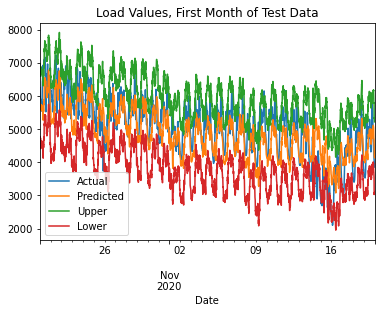

In [208]:
plt1 = first_month_test.plot(x='Date', y=['Actual', 'Predicted', 'yhat_upper', 'yhat_lower'], title='Load Values, First Month of Test Data')
# plt1.legend(["Actual"], bbox_to_anchor=(1.0,1.0))
# plt1 = new_df.plot(x="Date", y= ["Predicted", 'yhat_upper', 'yhat_lower'], ax=plt1, title= "Matic")
plt1.legend(['Actual', "Predicted", "Upper", "Lower"])
plt.savefig('first_month_test_2018_onwards_data.jpg')
plt.show()


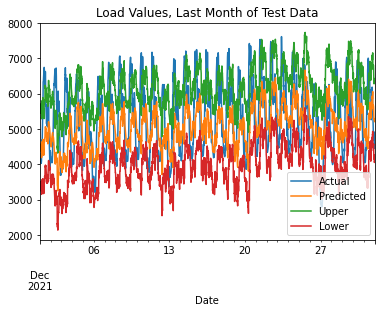

In [210]:
plt1 = last_month_test.plot(x='Date', y=['Actual', 'Predicted', 'yhat_upper', 'yhat_lower'], title='Load Values, Last Month of Test Data')
# plt1.legend(["Actual"], bbox_to_anchor=(1.0,1.0))
# plt1 = new_df.plot(x="Date", y= ["Predicted", 'yhat_upper', 'yhat_lower'], ax=plt1, title= "Matic")
plt1.legend(['Actual', "Predicted", "Upper", "Lower"])
plt.savefig('last_month_test_2018_onwards_data.jpg')
plt.show()


## Alignment Check

## Don't run alignment cells for now

In [49]:
# test_forecast.drop(test_forecast[test_forecast['ds'] == '2021-05-23 20:30:00'].index, inplace=True)

In [50]:
# test_forecast.drop(test_forecast[test_forecast['ds'] == '2021-05-23 20:45:00'].index, inplace=True)

In [51]:
# test_forecast.sort_index(inplace=True)

In [52]:
# df_test.sort_index(inplace=True)

In [53]:
# df_test.drop(columns='index', inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
# test_forecast.drop(columns='index', inplace=True)

In [55]:
# test_forecast['ds'].shape == df_test['ds'].shape

True

In [56]:
# test_forecast['ds'].dtype #== df_test['ds'].dtype

dtype('<M8[ns]')

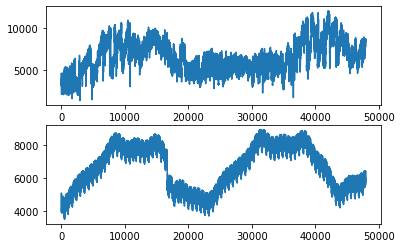

In [57]:
# fig, ax = plt.subplots(2, 1)
# ax[0].plot(df_test['y'])
# ax[1].plot(test_forecast['yhat'])

In [58]:
# test_forecast['ds'][0] 

Timestamp('2020-03-09 00:00:00')

In [59]:
# df_test['ds'][0]

'2020-03-09 14:45:00'

In [65]:
# test_forecast = test_forecast.loc[test_forecast.ds >= '2020-03-09 14:45:00']

In [67]:
# test_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1,2020-03-09 14:45:00,5900.296544,3171.916007,5481.531455,5900.296544,5900.296544,-1570.946404,-1570.946404,-1570.946404,-61.846437,...,-109.914857,-109.914857,-109.914857,-1399.185110,-1399.185110,-1399.185110,0.0,0.0,0.0,4329.350140
2,2020-03-09 15:00:00,5900.302799,3077.165376,5498.388928,5900.302799,5900.302799,-1623.693847,-1623.693847,-1623.693847,-119.318514,...,-105.157344,-105.157344,-105.157344,-1399.217989,-1399.217989,-1399.217989,0.0,0.0,0.0,4276.608952
3,2020-03-09 15:15:00,5900.309054,3066.869840,5327.756634,5900.309054,5900.309054,-1669.584775,-1669.584775,-1669.584775,-169.916058,...,-100.417891,-100.417891,-100.417891,-1399.250826,-1399.250826,-1399.250826,0.0,0.0,0.0,4230.724280
4,2020-03-09 15:30:00,5900.315309,3079.373219,5423.713692,5900.315309,5900.315309,-1705.636293,-1705.636293,-1705.636293,-210.654249,...,-95.698424,-95.698424,-95.698424,-1399.283620,-1399.283620,-1399.283620,0.0,0.0,0.0,4194.679017
5,2020-03-09 15:45:00,5900.321564,3004.327760,5337.678558,5900.321564,5900.321564,-1729.323872,-1729.323872,-1729.323872,-239.006654,...,-91.000844,-91.000844,-91.000844,-1399.316374,-1399.316374,-1399.316374,0.0,0.0,0.0,4170.997693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47940,2021-12-31 22:45:00,6298.023692,2654.680851,8900.592688,3384.662319,8921.753386,-329.310619,-329.310619,-329.310619,129.036825,...,112.260161,112.260161,112.260161,-570.607605,-570.607605,-570.607605,0.0,0.0,0.0,5968.713073
47941,2021-12-31 23:00:00,6298.029948,2590.503862,8722.852109,3384.626040,8921.964441,-391.839718,-391.839718,-391.839718,66.243844,...,112.498764,112.498764,112.498764,-570.582325,-570.582325,-570.582325,0.0,0.0,0.0,5906.190230
47942,2021-12-31 23:15:00,6298.036203,2517.721908,8791.146777,3384.589761,8922.175495,-451.199784,-451.199784,-451.199784,6.650845,...,112.706962,112.706962,112.706962,-570.557591,-570.557591,-570.557591,0.0,0.0,0.0,5846.836418
47943,2021-12-31 23:30:00,6298.042458,2315.394237,8732.876186,3384.553482,8922.386549,-506.743298,-506.743298,-506.743298,-49.093332,...,112.883437,112.883437,112.883437,-570.533404,-570.533404,-570.533404,0.0,0.0,0.0,5791.299160


In [68]:
# df_test.iloc[:test_forecast.shape[0]]

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir
0,2020-03-09 14:45:00,3894.86,24.9,11.6,43.40,0.0,20.2,283
1,2020-03-09 15:00:00,3851.25,24.1,10.1,41.18,0.0,20.5,280
2,2020-03-09 15:15:00,3465.93,24.1,10.1,41.18,0.0,20.5,280
3,2020-03-09 15:30:00,3306.17,24.1,10.1,41.18,0.0,20.5,280
4,2020-03-09 15:45:00,3258.34,24.1,10.1,41.18,0.0,20.5,280
...,...,...,...,...,...,...,...,...
47937,2021-09-09 22:45:00,8625.34,29.0,27.0,88.99,89.0,9.4,100
47938,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82
47939,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82
47940,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82


In [93]:
# fig, ax = plt.subplots(2, 1)
# ax[0].plot(df_test['y'])
# ax[1].plot(test_forecast['yhat'])

## Alignment Done

## Getting RMSE error

In [50]:
from sklearn.metrics import mean_squared_error
import numpy as np

rms = np.sqrt(mean_squared_error(df_test['y'], test_forecast['yhat']))

In [51]:
rms

1000.8013454365347

In [52]:
df_test['ds'][:-1]

0       2020-10-19 16:45:00
1       2020-10-19 17:00:00
2       2020-10-19 17:15:00
3       2020-10-19 17:30:00
4       2020-10-19 17:45:00
                ...        
42071   2021-12-31 22:30:00
42072   2021-12-31 22:45:00
42073   2021-12-31 23:00:00
42074   2021-12-31 23:15:00
42075   2021-12-31 23:30:00
Name: ds, Length: 42076, dtype: datetime64[ns]

In [53]:
test_forecast['ds']

0       2020-10-19 16:45:00
1       2020-10-19 17:00:00
2       2020-10-19 17:15:00
3       2020-10-19 17:30:00
4       2020-10-19 17:45:00
                ...        
42072   2021-12-31 22:45:00
42073   2021-12-31 23:00:00
42074   2021-12-31 23:15:00
42075   2021-12-31 23:30:00
42076   2021-12-31 23:45:00
Name: ds, Length: 42077, dtype: datetime64[ns]

In [54]:
# df_test['ds'] = pd.to_datetime(df_test['ds'])

In [55]:
# df_test

In [56]:
df_test['y'].mean()

6115.153494783383

In [57]:
mx = df_test['y'].max()
mn = df_test['y'].min()

In [58]:
nrmse = rms/(mx - mn)

In [59]:
nrmse

0.09614058191838384

In [211]:
import sklearn
r2s = sklearn.metrics.r2_score(df_test['y'], test_forecast['yhat'])
r2s

0.6448609235632107

In [212]:
sd = np.std(test_forecast['yhat'])
sd

1290.996526507624

## Create future Dataframes using MA for data that is not yet in the system

In [308]:
df_test.tail(7)

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir,visibility
210424,2021-12-31 22:15:00,4907.61,10.0,8.0,87.38,27.4,0.0,0.0,2.0
210425,2021-12-31 22:30:00,4847.97,10.0,8.0,87.38,27.4,0.0,0.0,2.0
210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0
210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210430,2021-12-31 23:45:00,4449.94,9.2,7.3,88.04,28.5,0.0,0.0,1.3


In [309]:
df_last_7 = df_test.tail(7)
df_last_7.reset_index(inplace=True)
df_last_7

,index,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir,visibility
0,210424,2021-12-31 22:15:00,4907.61,10.0,8.0,87.38,27.4,0.0,0.0,2.0
1,210425,2021-12-31 22:30:00,4847.97,10.0,8.0,87.38,27.4,0.0,0.0,2.0
2,210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0
3,210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3
4,210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3
5,210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3
6,210430,2021-12-31 23:45:00,4449.94,9.2,7.3,88.04,28.5,0.0,0.0,1.3


In [310]:
# df_last_7['temp'] = df_last_7['temp'].rolling(window=7, min_periods=1).mean()

In [311]:
df_last_7.rename(columns={'ds':'Date'}, inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [319]:
df_added = pd.DataFrame(df_last_7['Date'].append(pd.Series(pd.date_range('2022-01-01 00:00:00', '2022-01-31 23:45:00', freq='15min'))))

In [320]:
df_added.rename(columns={0:'Date'}, inplace=True)

In [331]:
df_added

,Date
0,2021-12-31 22:15:00
1,2021-12-31 22:30:00
2,2021-12-31 22:45:00
3,2021-12-31 23:00:00
4,2021-12-31 23:15:00
...,...
2971,2022-01-31 22:45:00
2972,2022-01-31 23:00:00
2973,2022-01-31 23:15:00
2974,2022-01-31 23:30:00


In [332]:
df_added_good = df_added.merge(df_last_7, left_on = 'Date', right_on='Date', how = 'left')

In [333]:
df_added_good.drop(columns=['index'], inplace=True)

In [334]:
df_added_good

,Date,y,temp,dew,humidity,cloudcover,windspeed,winddir,visibility
0,2021-12-31 22:15:00,4907.61,10.0,8.0,87.38,27.4,0.0,0.0,2.0
1,2021-12-31 22:30:00,4847.97,10.0,8.0,87.38,27.4,0.0,0.0,2.0
2,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0
3,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3
4,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3
...,...,...,...,...,...,...,...,...,...
2978,2022-01-31 22:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2979,2022-01-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2980,2022-01-31 23:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2981,2022-01-31 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [336]:
df_added_good.to_csv('Jan_22_future_DFs_for_MA_Analysis.csv')

In [328]:
df_added_good['temp'] = df_added_good['temp'].rolling(window=7, min_periods=1).mean()

In [329]:
df_added_good

,Date,y,temp,dew,humidity,cloudcover,windspeed,winddir,visibility
0,2021-12-31 22:15:00,4907.61,10.00,8.0,87.38,27.4,0.0,0.0,2.0
1,2021-12-31 22:30:00,4847.97,10.00,8.0,87.38,27.4,0.0,0.0,2.0
2,2021-12-31 22:45:00,4712.55,10.00,8.0,87.38,27.4,0.0,0.0,2.0
3,2021-12-31 23:00:00,4649.58,9.80,7.3,88.04,28.5,0.0,0.0,1.3
4,2021-12-31 23:15:00,4571.39,9.68,7.3,88.04,28.5,0.0,0.0,1.3
...,...,...,...,...,...,...,...,...,...
2978,2022-01-31 22:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2979,2022-01-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2980,2022-01-31 23:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2981,2022-01-31 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [337]:
df_test.to_csv('test_data.csv')

In [318]:
future = saved_mv_model.make_future_dataframe(periods=96*(365), freq='15min')

In [177]:
future

,ds
0,2018-01-01 00:00:00
1,2018-01-01 00:15:00
2,2018-01-01 00:30:00
3,2018-01-01 00:45:00
4,2018-01-01 01:00:00
...,...
133214,2021-10-19 15:30:00
133215,2021-10-19 15:45:00
133216,2021-10-19 16:00:00
133217,2021-10-19 16:15:00


In [178]:
future.tail()

,ds
133214,2021-10-19 15:30:00
133215,2021-10-19 15:45:00
133216,2021-10-19 16:00:00
133217,2021-10-19 16:15:00
133218,2021-10-19 16:30:00


## Make future forecast

In [180]:
saved_mv_model

In [179]:
forecast = saved_mv_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ValueError: Regressor 'temp' missing from dataframe

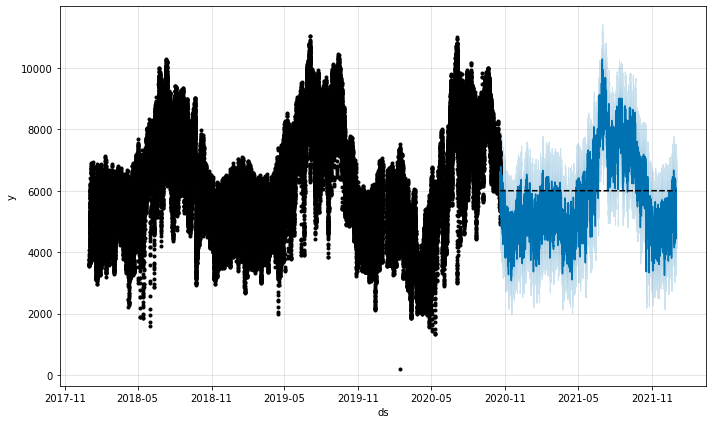

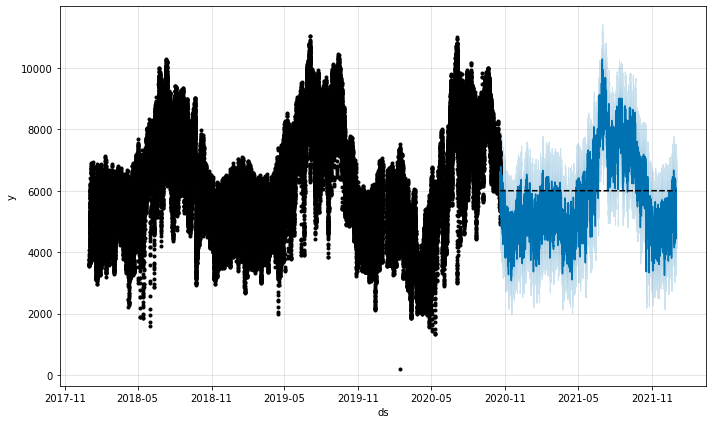

In [106]:
saved_mv_model.plot(forecast)